In [1]:
# Load the Module
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the Dataset
deal = pd.read_csv('/content/drive/MyDrive/데청캠_인바디/ZohoCRM_Dataset/deal_closed_prediction_data.csv')

print(deal.head())

X = deal[['Year', 'Month', 'Day', 'LeadSource', 'Territory', 'Industry']]
y = deal[['Stage']]

print(y.value_counts())

# Min-Max Scaling
# scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
# scaler = scaler.fit(X) 
# scaled = scaler.transform(X) 
# scaled_X = pd.DataFrame(scaled,columns=['Year', 'Month', 'Day', 'LeadSource', 'Territory', 'Industry'])

# StandarScaler 적용
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
scaled_X = pd.DataFrame(X_scaled,columns=['Year', 'Month', 'Day', 'LeadSource', 'Territory', 'Industry'])

   Year  Month  Day  LeadSource    Territory       Industry  Stage
0  2017      2    7    0.000458    50.000000  132320.620804      0
1  2017      2    7    0.000458    50.000000  132320.620804      0
2  2017      2    7    0.000458  3430.305858  132320.620804      1
3  2017      2    7    0.000458  1394.639984   61963.087644      1
4  2017      2   14    0.000458    50.000000  132320.620804      1
Stage
0        1212
1         929
dtype: int64


In [5]:
# Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(scaled_X , y, test_size=0.3, random_state=1)

print(X_train.shape)
print(y_test.shape)

(1498, 6)
(643, 1)


In [6]:
model = XGBClassifier(booster='gbtree',n_estimators= 300, learning_rate=0.37, gamma=1.6, silent=0,reg_alpha=.22,reg_lambda=1.65,max_depth=9, objective='binary:logistic')
model.fit(X_train, y_train)
print('Accuracy of Train : ',model.score(X_train,y_train)*100,'%')
pred_y = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of Train :  93.52469959946596 %


In [7]:
# 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 불러오기
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

# 0.8740
# 0.8756 -n_estimators= 200, learning_rate=0.04, gamma=1.3, silent=0,reg_alpha=.1,reg_lambda=1.34, max_depth=7, objective='binary:logistic'
#  0.8725 - n_estimators= 300, learning_rate=0.06, gamma=1.5, silent=0,reg_alpha=.2,reg_lambda=1.5, max_depth=7,
# .8740 (booster='gbtree',n_estimators= 300, learning_rate=0.1, gamma=1.5, silent=0,reg_alpha=.2,reg_lambda=1.5,max_depth=7, objective='binary:logistic')
# standard - .8740 (booster='gbtree',n_estimators= 300, learning_rate=0.1, gamma=1.5, silent=0,reg_alpha=.2,reg_lambda=1.5,max_depth=7, objective='binary:logistic')
# st - 0.8771 - (booster='gbtree',n_estimators= 300, learning_rate=0.37, gamma=1.6, silent=0,reg_alpha=.22,reg_lambda=1.6,max_depth=9, objective='binary:logistic')
# 0.88020 - (booster='gbtree',n_estimators= 300, learning_rate=0.37, gamma=1.6, silent=0,reg_alpha=.22,reg_lambda=1.65,max_depth=9, objective='binary:logistic')
get_clf_eval(y_test, pred_y)

오차행렬:
 [[331  35]
 [ 42 235]]

정확도: 0.8802
정밀도: 0.8704
재현율: 0.8484
F1: 0.8592
AUC: 0.8764


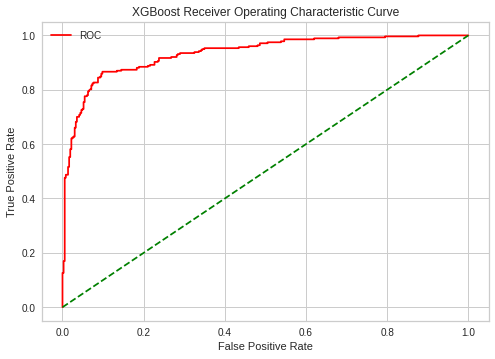

In [12]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt


def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('XGBoost Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
  
prob = model.predict_proba(X_test)
prob = prob[:, 1]
fper, tper, thresholds = roc_curve(y_test, prob)
plot_roc_curve(fper, tper)

In [ ]:
# Predict Test 
# x = [1.775041,0.454290228,1.704802765,-0.010379578,-0.676520868,-0.36018435]
# x = pd.DataFrame([x], columns=['Year', 'Month', 'Day', 'LeadSource', 'Territory', 'Industry'])
# print(x)
# model.predict(x)

       Year    Month       Day  LeadSource  Territory  Industry
0  1.775041  0.45429  1.704803    -0.01038  -0.676521 -0.360184


array([0])

Text(0.5, 0, 'F score')

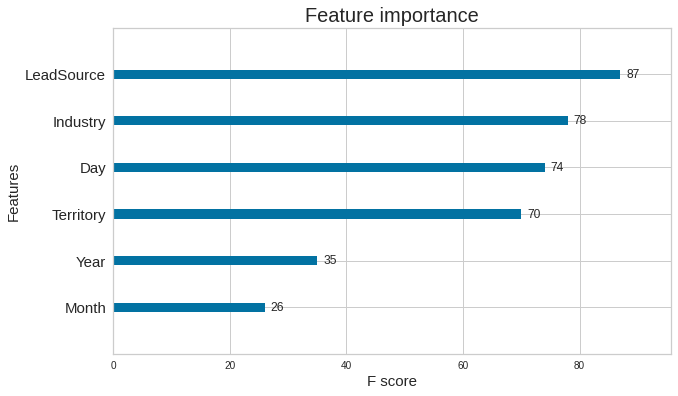

In [30]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
# 특성 중요도 시각화
fig, ax = plt.subplots(figsize=(10,6))
plot_importance(model, ax=ax)
plt.title('Feature importance', fontsize = 20)
plt.yticks(fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.xlabel('F score', fontsize = 15)

In [ ]:
# 모델 저장
filename = 'Inbody_deal_complete_predict.model'
model.save_model(filename)

# 모델 불러오기
new_xgb_model = XGBClassifier() # 모델 초기화
new_xgb_model.load_model(filename) # 모델 불러오기

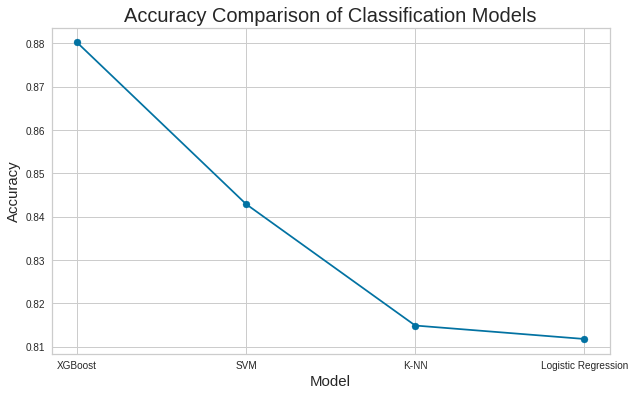

In [44]:
# Plot the Other Accuracy
x = ['XGBoost','SVM','K-NN','Logistic Regression']
y = [0.8802, 0.8429, 0.8149,0.8118]

plt.figure(figsize=(10,6))
plt.title('Accuracy Comparison of Classification Models', fontsize=20)
# for i, x_ in enumerate(x):
#     plt.text(x_, y[i], y[i],
#              fontsize=10,
#              color='black',
#              horizontalalignment='center',
#              verticalalignment='bottom')
plt.scatter(x,y)
plt.plot(x,y)
plt.ylabel('Accuracy', fontsize = 15)
plt.xlabel('Model', fontsize = 15)
plt.show()
